In [1]:
import pandas as pd

# Load dataset with sentiment labels
df = pd.read_csv("test(in)_with_sentiment.csv")

# Filter only negative mails
negatives = df[df['sentiment'] == 'Negative'].copy()

# Count total negative mails per employee
neg_counts = negatives.groupby('from').size().reset_index(name='Total_Neg_Mails')

# Flight risk condition: employees with >= 4 negative mails
flight_risk = neg_counts[neg_counts['Total_Neg_Mails'] >= 4].copy()

# Save results
flight_risk.to_csv("flight_risk_total_negative.csv", index=False)

print("✅ Flight risk employees (based on total negatives) identified and saved!")

print("\n📌 Sample flagged employees:")
print(flight_risk.head(10))


✅ Flight risk employees (based on total negatives) identified and saved!

📌 Sample flagged employees:
                          from  Total_Neg_Mails
0  bobette.riner@ipgdirect.com              129
1       don.baughman@enron.com              131
2          eric.bass@enron.com              114
3        john.arnold@enron.com              145
4      johnny.palmer@enron.com              109
5      kayne.coulter@enron.com              106
6      lydia.delgado@enron.com              150
7     patti.thompson@enron.com              126
8      rhonda.denton@enron.com              109
9         sally.beck@enron.com              125


C:\Users\aryan\AppData\Local\Temp\ipykernel_15344\209710337.py:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\aryan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


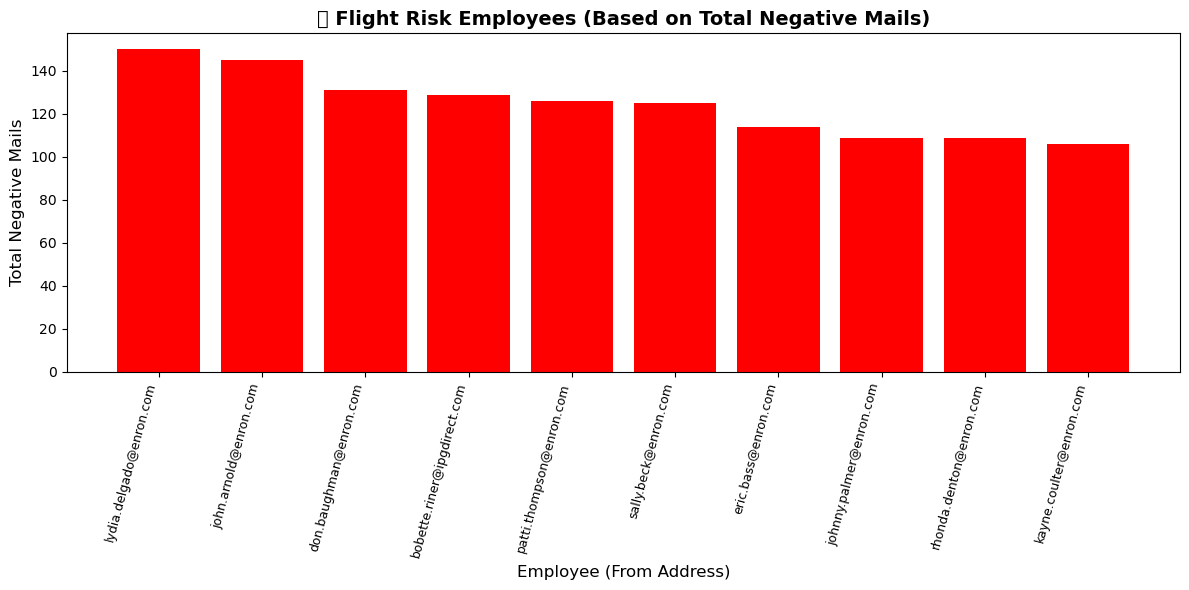

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset with sentiment labels
df = pd.read_csv("test(in)_with_sentiment.csv")

# Filter only negative mails
negatives = df[df['sentiment'] == 'Negative'].copy()

# Count total negative mails per employee
neg_counts = negatives.groupby('from').size().reset_index(name='Total_Neg_Mails')

# Flight risk condition: employees with >= 4 negative mails
flight_risk = neg_counts[neg_counts['Total_Neg_Mails'] >= 4].copy()

# Sort for better visualization (highest first)
flight_risk = flight_risk.sort_values(by="Total_Neg_Mails", ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(flight_risk['from'], flight_risk['Total_Neg_Mails'], color='red')

plt.xticks(rotation=75, ha='right', fontsize=9)
plt.xlabel("Employee (From Address)", fontsize=12)
plt.ylabel("Total Negative Mails", fontsize=12)
plt.title("📊 Flight Risk Employees (Based on Total Negative Mails)", fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()
